In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_x_data = pd.read_csv('X_data.csv', sep = ';') 

In [3]:
df_y_submit = pd.read_csv('Y_submit.csv', sep = ';') 

In [4]:
df_y_train = pd.read_csv('Y_train.csv', sep = ';') 

# Задание
Вам необходимо построить модель, которая на основании данных, поступающих каждую минуту, определяют качество продукции, производимое на обжиговой машине.

Обжиговая машина представляет собой агрегат, состоящий из 5 одинаковых по размеру камер, в каждой камере установлено по 3 датчика температур. Кроме этого, для данной задачи Вы собрали данные о высоте слоя сырья и его влажности. Высота слоя и влажность измеряются при входе сырья в машину. Сырье проходит через обжиговую машину за час.

Данные с показателями работы обжиговой машины содержатся в файле X_data.csv:

Название тега Описание тега
T_data_1_1 1-й датчик в 1-й камере
T_data_1_2 2-й датчик в 1-й камере
T_data_1_3 3-й датчик в 1-й камере
T_data_2_1 1-й датчик во 2-й камере
T_data_2_2 2-й датчик во 2-й камере
T_data_2_3 3-й датчик во 2-й камере
T_data_3_1 1-й датчик в 3-й камере
T_data_3_2 2-й датчик в 3-й камере
T_data_3_3 3-й датчик в 3-й камере
T_data_4_1 1-й датчик в 4-й камере
T_data_4_2 2-й датчик в 4-й камере
T_data_4_3 3-й датчик в 4-й камере
T_data_5_1 1-й датчик в 5-й камере
T_data_5_2 2-й датчик в 5-й камере
T_data_5_3 3-й датчик в 5-й камере
H_data Высота слоя
AH_data Влажность сырья
Качество продукции измеряется в лаборатории по пробам, которые забираются каждый час, данные по известным анализам содержатся в файле Y_train.csv. В файле указано время забора пробы, проба забирается на выходе из обжиговой машины.

Вы договорились с заказчиком, что оценкой модели будет являться показатель MAE, для оценки модели необходимо сгенерировать предсказания за период, указанный в файле Y_submit.csv (5808 предиктов).

In [5]:
from datetime import datetime, timedelta

print(df_x_data['Unnamed: 0'].dtype)
df_x_data['Time'] = pd.to_datetime(df_x_data['Unnamed: 0']) + timedelta(hours=1)
print(df_x_data['Unnamed: 0'].dtype)

object
object


In [6]:
df_x_data['T_avg_1'] = (df_x_data['T_data_1_1'] + df_x_data['T_data_1_2'] + df_x_data['T_data_1_3'])/3

In [7]:
df_x_data['T_avg_2'] = (df_x_data['T_data_2_1'] + df_x_data['T_data_2_2'] + df_x_data['T_data_2_3'])/3

In [8]:
df_x_data['T_avg_3'] = (df_x_data['T_data_3_1'] + df_x_data['T_data_3_2'] + df_x_data['T_data_3_3'])/3

In [9]:
df_x_data['T_avg_4'] = (df_x_data['T_data_4_1'] + df_x_data['T_data_4_2'] + df_x_data['T_data_4_3'])/3

In [10]:
df_x_data['T_avg_5'] = (df_x_data['T_data_5_1'] + df_x_data['T_data_5_2'] + df_x_data['T_data_5_3'])/3

In [11]:
X = df_x_data.loc[df_x_data.index.isin(df_y_train.index)]
X.shape, df_y_train.shape

((29184, 24), (29184, 2))

In [12]:
X = X.drop('Unnamed: 0', 1) 

In [13]:
df_y_train = df_y_train.drop('Time', 1)

In [14]:
df_y_train.reset_index(inplace = True)

# корреляция

In [15]:
X = X.reset_index()

In [16]:
correlation_X_Y = df_y_train.merge(X, how = 'left', on = 'index' )

In [17]:
correlation_X_Y = correlation_X_Y.drop(['index', 'Time'], 1)

In [18]:
correlation_X_Y = correlation_X_Y.corr()

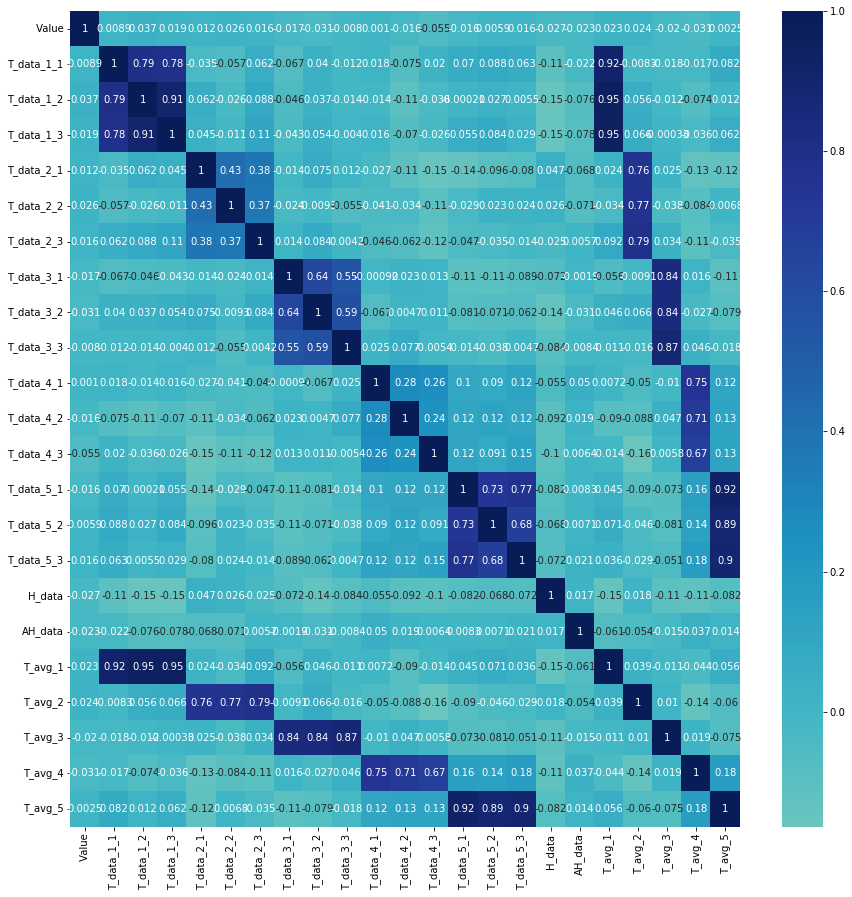

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_X_Y, center=0, annot=True, cmap="YlGnBu")

In [20]:
X = X.drop(['index', 'Time'], 1) 

In [21]:
X

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,...,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,T_avg_1,T_avg_2,T_avg_3,T_avg_4,T_avg_5
0,212,210,211,347,353,347,474,473,481,346,...,241,241,243,167.85,9.22,211.000000,349.000000,476.000000,349.666667,241.666667
1,212,211,211,346,352,346,475,473,481,349,...,241,241,243,162.51,9.22,211.333333,348.000000,476.333333,350.666667,241.666667
2,212,211,211,345,352,346,476,473,481,352,...,242,241,242,164.99,9.22,211.333333,347.666667,476.666667,352.000000,241.666667
3,213,211,211,344,351,346,477,473,481,355,...,242,241,242,167.34,9.22,211.666667,347.000000,477.000000,353.000000,241.666667
4,213,211,211,343,350,346,478,473,482,358,...,243,241,242,163.04,9.22,211.666667,346.333333,477.666667,354.000000,242.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,275,276,266,180,376,356,495,506,486,341,...,234,220,223,154.12,6.19,272.333333,304.000000,495.666667,328.666667,225.666667
29180,275,276,266,181,376,355,495,507,486,341,...,234,220,224,158.79,6.19,272.333333,304.000000,496.000000,328.666667,226.000000
29181,275,276,266,183,376,354,495,507,486,341,...,234,219,224,154.83,6.19,272.333333,304.333333,496.000000,328.333333,225.666667
29182,275,276,265,185,376,354,495,507,486,341,...,234,219,224,153.68,6.19,272.000000,305.000000,496.000000,328.333333,225.666667


# линейная регрессия

In [22]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X) 
scaled_df = scaler.transform(X)

# построение и оценка модели

In [26]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 
linear_regression_model.fit(scaled_df, df_y_train[' Value'])
predictions = linear_regression_model.predict(scaled_df)
mae = mean_absolute_error(df_y_train[' Value'], predictions) 
print("MAE: {}".format(np.sqrt(mae)))

MAE: 6.129784072356212



# прогнозы по модели для тестовой выборки

In [27]:
Y_pred_test = pd.DataFrame(predictions)
Y_pred_test.reset_index(inplace = True)
#df_y_train.reset_index(inplace = True)
Y_pred_test = Y_pred_test.merge(df_y_train, how = 'left', on = 'index')

In [28]:
Y_pred_test['Predictions'] = Y_pred_test[0]


In [29]:
Y_pred_test

,index,0,Value,Predictions
0,0,400.839756,392,400.839756
1,1,401.884880,384,401.884880
2,2,401.278074,393,401.278074
3,3,400.879268,399,400.879268
4,4,401.470118,400,401.470118
...,...,...,...,...
29179,29179,414.270639,438,414.270639
29180,29180,413.555651,452,413.555651
29181,29181,414.183092,455,414.183092
29182,29182,414.433710,455,414.433710


In [30]:
Y_pred_test.to_csv('Прогноз модели по тестовой выборке с допиками. csv')

# прогнозы модели по Y_submit

In [31]:
X_submit = df_x_data.loc[df_x_data.index.isin(df_y_submit.index)]
X_submit.shape, df_y_submit.shape

((5808, 24), (5808, 2))

In [32]:
X_submit = X_submit.drop('Unnamed: 0', 1) 

In [33]:
Y_submit = df_y_submit.drop('Time', 1) 

In [34]:
X_submit = X_submit.loc[X_submit.index.isin(Y_submit.index)]

In [35]:
X_submit = X_submit.drop('Time', 1) 


In [36]:
X_submit

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,...,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,T_avg_1,T_avg_2,T_avg_3,T_avg_4,T_avg_5
0,212,210,211,347,353,347,474,473,481,346,...,241,241,243,167.85,9.22,211.000000,349.000000,476.000000,349.666667,241.666667
1,212,211,211,346,352,346,475,473,481,349,...,241,241,243,162.51,9.22,211.333333,348.000000,476.333333,350.666667,241.666667
2,212,211,211,345,352,346,476,473,481,352,...,242,241,242,164.99,9.22,211.333333,347.666667,476.666667,352.000000,241.666667
3,213,211,211,344,351,346,477,473,481,355,...,242,241,242,167.34,9.22,211.666667,347.000000,477.000000,353.000000,241.666667
4,213,211,211,343,350,346,478,473,482,358,...,243,241,242,163.04,9.22,211.666667,346.333333,477.666667,354.000000,242.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,297,303,290,329,328,320,416,442,418,325,...,270,263,258,195.06,8.05,296.666667,325.666667,425.333333,324.333333,263.666667
5804,297,303,290,330,329,321,416,442,418,325,...,269,262,257,190.94,8.05,296.666667,326.666667,425.333333,324.000000,262.666667
5805,297,303,290,330,330,321,416,443,418,326,...,269,262,257,191.08,8.05,296.666667,327.000000,425.666667,324.333333,262.666667
5806,297,303,290,330,330,321,416,443,418,326,...,269,262,256,193.78,8.05,296.666667,327.000000,425.666667,324.333333,262.333333


In [37]:
Y_submit

,Value
0,420
1,420
2,420
3,420
4,420
...,...
5803,420
5804,420
5805,420
5806,420


In [38]:
scaler = StandardScaler()
scaler.fit(X_submit) 
scaled_df_submit = scaler.transform(X_submit)

In [39]:
Y_pred = pd.DataFrame(linear_regression_model.predict(scaled_df_submit))

In [40]:
Y_pred.reset_index(inplace = True)

In [41]:
df_y_submit.reset_index(inplace = True)

In [42]:
Y_pred = Y_pred.merge(df_y_submit, how = 'left', on = 'index')

In [43]:
Y_pred["Model's prediction"] = Y_pred[0]

In [44]:
Y_pred

,index,0,Time,Value,Model's prediction
0,0,400.619728,2018-05-04 00:05:00,420,400.619728
1,1,401.568059,2018-05-04 01:05:00,420,401.568059
2,2,400.905865,2018-05-04 02:05:00,420,400.905865
3,3,400.524059,2018-05-04 03:05:00,420,400.524059
4,4,401.018086,2018-05-04 04:05:00,420,401.018086
...,...,...,...,...,...
5803,5803,406.860566,2018-12-31 19:05:00,420,406.860566
5804,5804,407.630915,2018-12-31 20:05:00,420,407.630915
5805,5805,407.592941,2018-12-31 21:05:00,420,407.592941
5806,5806,407.025367,2018-12-31 22:05:00,420,407.025367


In [45]:
Y_pred = Y_pred.drop(columns = ['index',0, 'Time'])

# Графики

In [46]:
Y_pred_test.head()

,index,0,Value,Predictions
0,0,400.839756,392,400.839756
1,1,401.884880,384,401.884880
2,2,401.278074,393,401.278074
3,3,400.879268,399,400.879268
4,4,401.470118,400,401.470118


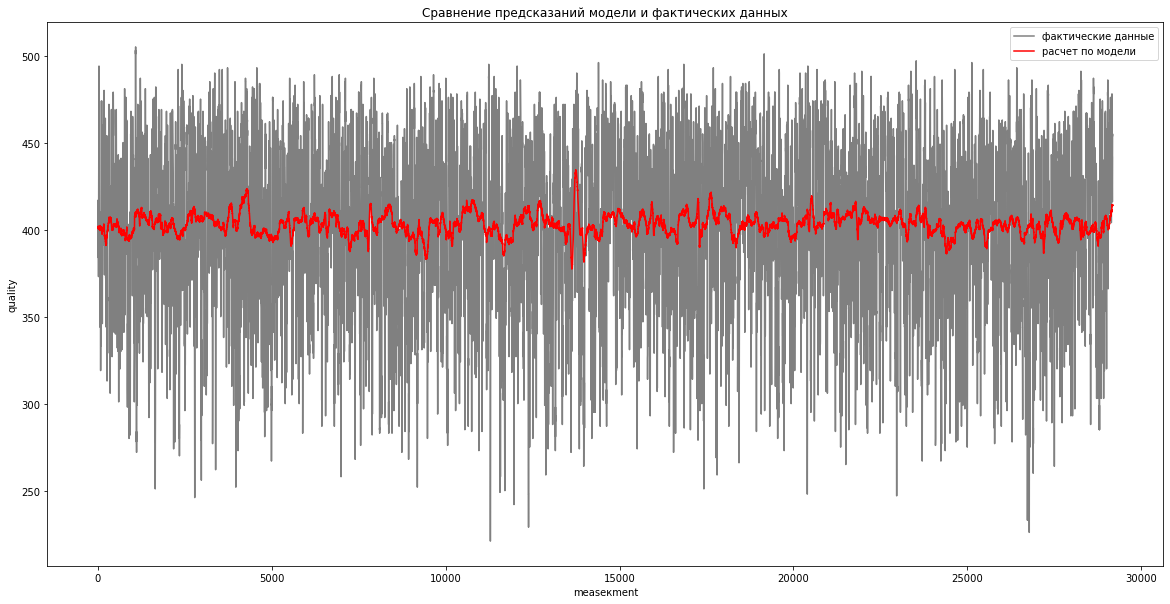

In [47]:
fig, ax = plt.subplots (figsize = (20,10))
ax.plot (Y_pred_test['index'], Y_pred_test[' Value'], label = 'фактические данные', color='gray')
ax.plot (Y_pred_test['index'], Y_pred_test['Predictions'],  label = 'расчет по модели', color='red')
#ax.plot (df22['Year'], df22['JP_Sales'], label = 'JP_Sales', color='yellow')
#ax.plot (df23['Year'], df23['Global_Sales'], label = 'Global_Sales', color='black')


ax.set_title('Сравнение предсказаний модели и фактических данных')
ax.set_xlabel('measeкment')
ax.set_ylabel('quality')
ax.legend()
plt.show()

In [48]:
Y_pred

,Value,Model's prediction
0,420,400.619728
1,420,401.568059
2,420,400.905865
3,420,400.524059
4,420,401.018086
...,...,...
5803,420,406.860566
5804,420,407.630915
5805,420,407.592941
5806,420,407.025367


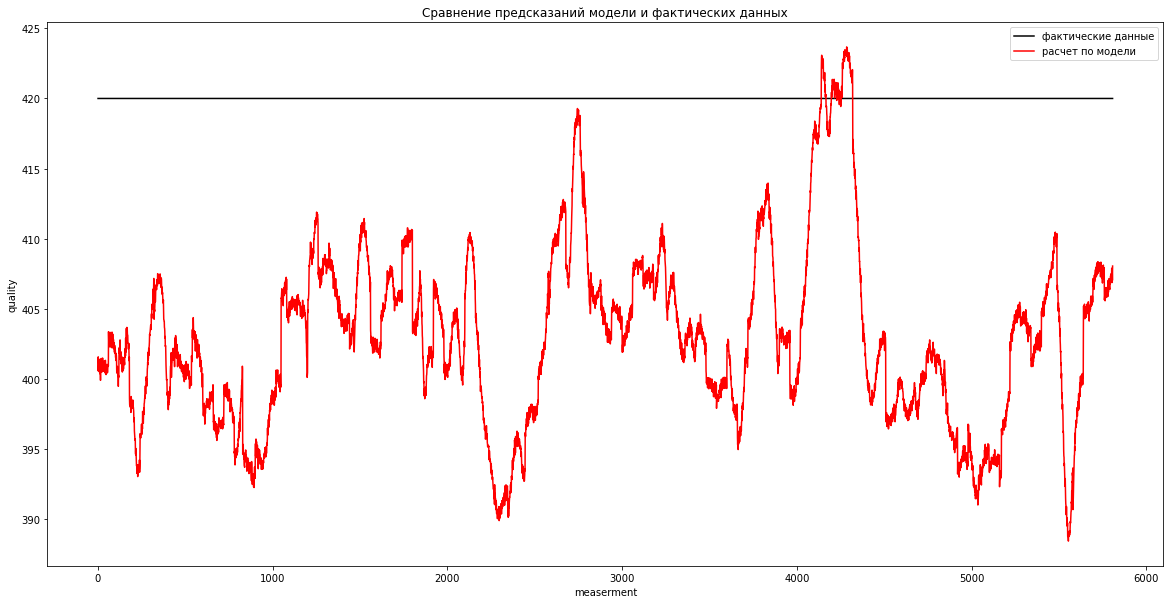

In [49]:
fig, ax = plt.subplots (figsize = (20,10))
ax.plot ( Y_pred[' Value'], label = 'фактические данные', color='black')
ax.plot ( Y_pred["Model's prediction"],  label = 'расчет по модели', color='red')
#ax.plot (df22['Year'], df22['JP_Sales'], label = 'JP_Sales', color='yellow')
#ax.plot (df23['Year'], df23['Global_Sales'], label = 'Global_Sales', color='black')


ax.set_title('Сравнение предсказаний модели и фактических данных')
ax.set_xlabel('measerment')
ax.set_ylabel('quality')
ax.legend()
plt.show()

In [50]:
y_train = pd.read_csv('Y_train.csv', sep = ';') 

In [51]:
y_submit = pd.read_csv('Y_submit.csv', sep = ';') 

In [52]:
y_submit = y_submit.reset_index()

In [53]:
Y_pred_for_image = Y_pred.reset_index()

In [54]:
y_submit = y_submit.merge(Y_pred_for_image, how = 'left', on = 'index')

In [55]:
y_submit['Time'] = pd.to_datetime(y_submit['Time'])

In [56]:
y_train['Time'] = pd.to_datetime(y_train['Time'])

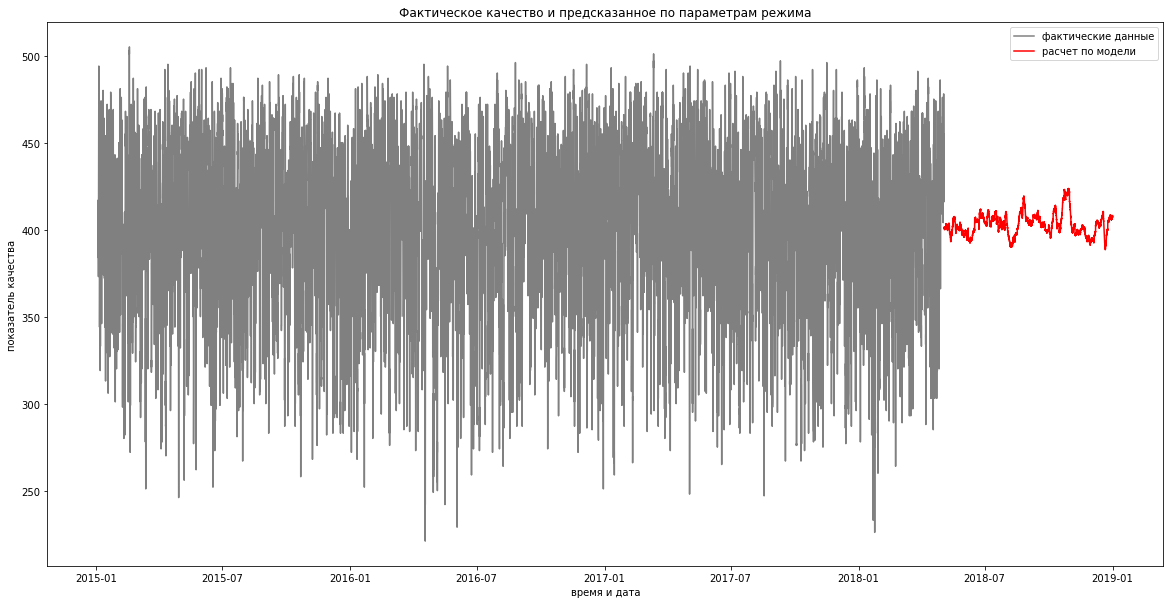

In [57]:
fig, ax = plt.subplots (figsize = (20,10))
ax.plot ( y_train['Time'], y_train[' Value'], label = 'фактические данные', color='grey')
ax.plot ( y_submit['Time'], y_submit["Model's prediction"],  label = 'расчет по модели', color='red')
#ax.plot (df22['Year'], df22['JP_Sales'], label = 'JP_Sales', color='yellow')
#ax.plot (df23['Year'], df23['Global_Sales'], label = 'Global_Sales', color='black')


ax.set_title('Фактическое качество и предсказанное по параметрам режима')
ax.set_xlabel('время и дата')
ax.set_ylabel('показатель качества')
ax.legend()